# Building a NN From Scratch Using Numpy and Tackling The MNIST Dataset

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image 
from IPython.display import display

In [9]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

IMAGE_PATH = 'Images/'

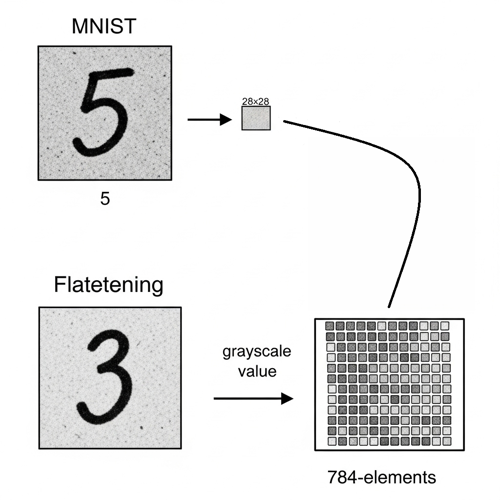

In [10]:
# Our Dataset Overview

img = Image.open(IMAGE_PATH + "MNIST-Overview.png").resize((500, 500))
display(img)